# Eigen things

## Covariance, Variance and Eigen values/vectors


#### Eigen values/Vectors

- are very special to many engineering applications
- help predict behaviour of the system
- Show the **relative behaviour/dominance** of the certain aspects of the system

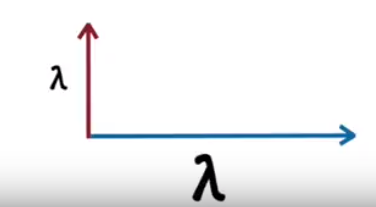

- Eigen vectors show the direction of spread of the data
- Eigen values indicate the magnitude of the spread of the data (importance of certain attributes in the system)

#### covriance

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import scipy.linalg as la
%matplotlib inline

In [2]:
# negative COV
# data = np.array([[18, 5],
#                  [15, 11],
#                  [11, 13],
#                  [10, 16],
#                  [8, 14], 
#                  [5.5, 16]])

# positive COV
data = np.array([[5, 8],
                 [7, 11],
                 [11, 13],
                 [16, 16],
                 [18, 24], 
                 [23, 36]])

# No COV
# data = np.array([[5, 5],
#                  [7, 6.7],
#                  [11, 6.1],
#                  [16, 5.6],
#                  [18, 5.1], 
#                  [23, 6]])


x_bar = np.round(np.mean(data[:, 0]), 4)
y_bar = np.round(np.mean(data[:, 1]), 4)

In [3]:
x_bar, y_bar

(13.3333, 18.0)

In [4]:
df = pd.DataFrame(data, columns=['x1', 'x2'])
df['x1-mean'] = df.x1 - x_bar
df['x2-mean'] = df.x2 - y_bar
df

,x1,x2,x1-mean,x2-mean
0,5,8,-8.3333,-10.0
1,7,11,-6.3333,-7.0
2,11,13,-2.3333,-5.0
3,16,16,2.6667,-2.0
4,18,24,4.6667,6.0
5,23,36,9.6667,18.0


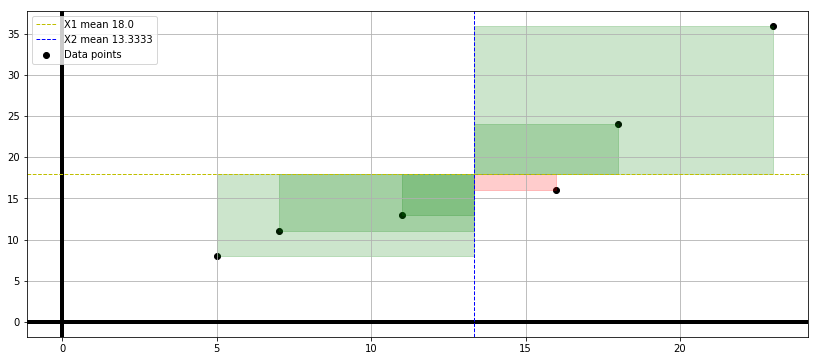

In [5]:
plt.figure(figsize=(14, 6))

ax = plt.gca()
plt.grid()

ax.axhline(linewidth=4, color='k')
ax.axvline(linewidth=4, color='k')

# plot the random number
ax.scatter(data[:, 0], data[:, 1], c='k', label='Data points')

ax.axhline(y= y_bar, linewidth=1, color='y', linestyle="--", label = 'X1 mean {}'.format((y_bar)))
ax.axvline(x= x_bar, linewidth=1, color='b', linestyle="--", label = 'X2 mean {}'.format((x_bar)))

# read all the data points
for idx, row in df.iterrows():
    someX, someY = row.x1, row.x2
    
    dist_x_bar  = someX - x_bar
    dist_y_bar  = someY - y_bar
    
    # positive or negative relation
    if dist_x_bar * dist_y_bar < 0:
        fill_color = ['red']
        ax.add_patch(Rectangle((someX , someY ), -dist_x_bar, -dist_y_bar, color='r', alpha=.2))
    else:
        fill_color = ['green']
        ax.add_patch(Rectangle((someX , someY ), -dist_x_bar, -dist_y_bar, color='g', alpha=.2))
            
ax.legend();

In [11]:
# cov and corr
print(df[['x1', 'x2']].cov())
print(df[['x1', 'x2']].corr())

           x1     x2
x1  47.466667 -0.320
x2  -0.320000  0.419
          x1        x2
x1  1.000000 -0.071754
x2 -0.071754  1.000000


A COV matrix is also denoted by SIGMA, $\Large \Sigma$

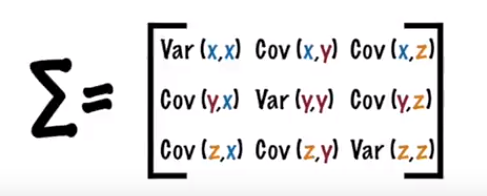

|Eigen Value  | 10  | 8  |  6  |  4  | 
|-----------  |-----|----|-----|-----|
|Eigen Vectors| v1  | v2  |  v3  |  v4  | 




#### Eigen values and vector

An eigenvector is a nonzero vector that satisfies the equation

$$ \Large A.\bar{v} = \lambda.\bar{v}$$

where A is a square matrix, λ is a scalar, and $\bar v$ is the eigenvector

- λ is called an eigenvalue.
- Eigenvalues and eigenvectors are also known as, respectively, characteristic roots and characteristic vectors, 
- or latent roots and latent vectors

__Solving__ eigen values and vectors of the matrix

$$ 
A = {\begin{bmatrix} 2 \quad 1 \\ 1 \quad 2 \end{bmatrix}}
$$
Applying $$ A.\bar{v} = \lambda.\bar{v}$$

$$
{\begin{bmatrix} 2 \quad 1 \\ 1 \quad 2 \end{bmatrix}}.
{\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}}
= \lambda.{\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}}
$$ 

__solve for λ, x1 and x2__
$$
2x_1 + x_2 = λx_1
$$
$$
x_1 + 2x_2 = λx_2
$$

$$
(2-\lambda)x_1 + x_2 = 0
$$
$$
x_1 + (2- \lambda)x_2 = 0
$$

A necessary and sufficient condition for this system to have a nonzero vector [x1, x2] is that
the __determinant of the coefficient matrix = 0__

Accordingly,

$$
{\begin{vmatrix} (2 - \lambda) \quad \quad 1 \\ 1 \quad \quad (2 - \lambda) \end{vmatrix}} 
= 0
$$

$$
(2 - \lambda).(2 - \lambda) - 1.1 = 0 \\     
\lambda^2 - 4\lambda + 3 = 0 \\    
(\lambda - 3)(\lambda - 1) = 0
$$

There are two values of λ that satisfy the last equation; thus there are two eigenvalues of the original matrix A and these are $λ_1 = 3,\> λ_2 = 1$

We can find eigenvectors which correspond to these eigenvalues by plugging λ back in to the equations above and solving for $x_1, \> x_2$

To find an eigenvector corresponding to λ = 3, start with, and substitute λ = 3 to get
$$
(2-\lambda)x_1 + x_2 = 0 \\
(2- 3)x_1 + x_2 = 0 \\
$$
which reduces and rearranges to
$$x_1 = x_2$$

There are an infinite number of values for x1 which satisfy this equation; the only restriction is that not all the components in an eigenvector can equal zero.

So if x1 = 1, then x2 = 1
and an __eigenvector corresponding to λ = 3 is [1, 1]__

Finding an eigenvector for λ = 1 works the same way.
$$(2 − 1)x_1 + x_2 = 0 \\
x_1 = −x_2
$$
So an __eigenvector for λ = 1 is [1, −1]__

# Some examples of Eigenthings

#### using scipy linalg

In [9]:
A = np.array([[1,0],[0,-2]])
print(A)

[[ 1  0]
 [ 0 -2]]


The function la.eig returns a tuple (eigvals,eigvecs) where 
- eigvals is a 1D NumPy array of complex numbers giving the eigenvalues of , 
- and eigvecs is a 2D NumPy array with the corresponding eigenvectors in the columns

In [10]:
results = la.eig(A)

In [6]:
results

(array([ 1.+0.j, -2.+0.j]), array([[1., 0.],
        [0., 1.]]))

In [11]:
print(results[0])
print(results[1])

[ 1.+0.j -2.+0.j]
[[1. 0.]
 [0. 1.]]


Or we can unpack the tuple like below ...

In [12]:
eigvals, eigvecs = la.eig(A)
print(eigvals)
print(eigvecs)

[ 1.+0.j -2.+0.j]
[[1. 0.]
 [0. 1.]]


If we know that the eigenvalues are real numbers (ie. if  is symmetric), then we can use the NumPy array method .real to convert the array of eigenvalues to real numbers:

In [13]:
eigvals = eigvals.real
print(eigvals)

[ 1. -2.]


Notice that the position of an eigenvalue in the array eigvals correspond to the column in eigvecs with its eigenvector:

In [14]:
eval1 = eigvals[0]
eval2 = eigvals[1]

print(eval1)
print(eval2)

1.0
-2.0


In [10]:
ev1 = eigvecs[:,1].reshape(2,1)
print(ev1)

[[0.]
 [1.]]


#### using numpy linalg

In [15]:
# define a square matrix
n = 3
A = np.random.randint(0, 10, (n, n))
A

array([[9, 8, 9],
       [5, 6, 7],
       [7, 3, 8]])

In [16]:
evals, evecs = np.linalg.eig(A)
evals = evals.real
evecs = evecs.real

In [17]:
print(evals)
print(evecs)

[20.75842702  1.12078649  1.12078649]
[[ 0.71525653  0.51297787  0.51297787]
 [ 0.48223583  0.27280887  0.27280887]
 [ 0.50582279 -0.64095579 -0.64095579]]


In [83]:
evecs[:, 1]@evecs[:, 0]

-0.643956150410322

since the dot product is not near 0, hence the eigen vectors are not orthogonal ...

# Matrices

In [6]:
# A row matrix in NumPy.
x = np.array([[3, 4, 5, 6]])
print(x)
type(x)

[[3 4 5 6]]


numpy.ndarray

In [7]:
print(x.shape)

(1, 4)


In [8]:
# try with 1 bracket
x1 = np.array([3, 4, 5, 6])
print(x1.shape)
type(x1)

(4,)


numpy.ndarray

In [9]:
# A column matrix in NumPy.
x.T

array([[3],
       [4],
       [5],
       [6]])

In [10]:
print(x.T.shape)

(4, 1)


In [11]:
A = np.array([[1, 2, 3], [3, 4, 5]])
print(A)

A = np.array([[1.1, 2, 3], [3, 4, 5]]) # Array of floats
print(A)

A = np.array([[1, 2, 3], [3, 4, 5]], dtype = complex) # Array of complex numbers
print(A)

[[1 2 3]
 [3 4 5]]
[[1.1 2.  3. ]
 [3.  4.  5. ]]
[[1.+0.j 2.+0.j 3.+0.j]
 [3.+0.j 4.+0.j 5.+0.j]]


In [13]:
zeors_array = np.zeros( (4, 4) )
print(zeors_array)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [21]:
np.random.randint(10, 500, size=(5, 5))

array([[302, 159, 473, 295, 415],
       [499, 130, 422, 328, 240],
       [288, 464, 413, 422, 125],
       [370, 134, 428, 479,  25],
       [200, 233,  35, 322,  64]])

## but what is matrix

## Symmetric Matrices

- Square matrix
- Its inverse is also symmetrical.
- $A = A^T$
- $A_{i,j} = A_{j,i}$
- The eigenvalues of a symmetric matrix are always real (not a complex number) 
- the eigenvectors are always orthogonal! 


Symmetric matrices are one of the most important matrices in linear algebra and machine learning. 

- In machine learning (ML), we often use matrices to hold f(vᵢ , vⱼ). 
- Such functions are often symmetrical, f(x, y) = f(y, x), and the corresponding matrix is therefore symmetric. 
- For instance, in machine earning, 
    - f can measure the feature distance between data points or 
    - calculates the covariance of features.



### Example 1

In [22]:
n = 4
A = np.random.randint(0, 10, (n, n))
print(A)

[[1 9 8 0]
 [7 8 8 0]
 [3 5 0 3]
 [7 0 0 0]]


In [23]:
# create symmetric matrix
S = A @ A.T

#### Check if the matrix is symmetric

** method 1 ** - the eigenvectors must be orthogonal

In [32]:
evals, evecs = la.eig(S)
print(evals)

[469.58677188+0.j  78.12844681+0.j  20.25198277+0.j   1.03279855+0.j]


In [33]:
evals = evals.real
print(evals)

[469.58677188  78.12844681  20.25198277   1.03279855]


In [34]:
print(evecs)

[[ 0.49551771  0.2542265  -0.75435523  0.34753312]
 [ 0.57642567 -0.73155083 -0.03487042 -0.36242363]
 [ 0.44351207  0.63177138  0.2314632  -0.59210366]
 [ 0.4748607   0.03266792  0.61331641  0.63030397]]


In [35]:
v1 = evecs[:,0] # First column is the first eigenvector
print(v1)

[0.49551771 0.57642567 0.44351207 0.4748607 ]


In [36]:
v2 = evecs[:,1] # Second column is the second eigenvector
print(v2)

[ 0.2542265  -0.73155083  0.63177138  0.03266792]


check for orthogonality of eigen vectors ..

In [86]:
v1.dot(v2)

7.112366251504909e-17

In [87]:
v1@v2

7.112366251504909e-17

The dot product of eigenvectors  and  is zero (the number above is very close to zero and is due to rounding errors in the computations) and so they are orthogonal!

** method 2 **  - check if the elements of A and A.T are same

In [25]:
S.shape[0]

4

In [ ]:
def transpose(mat, tr, N): 
    for i in range(N): 
        for j in range(N): 
            tr[i][j] = mat[j][i] 

#### Example 2

In [88]:
n = 5
P = np.random.randint(0, 10, (n, n))
print(P)

[[3 6 1 6 3]
 [6 5 8 7 3]
 [1 2 1 5 9]
 [3 3 9 1 1]
 [8 4 8 7 6]]


In [89]:
evals, evecs = la.eig(P)
evals = evals.real
print(evals)
print(evecs)

[22.80714964 -7.88888218 -2.04621182  1.56397218  1.56397218]
[[-0.35965385+0.j         -0.44862418+0.j          0.09385478+0.j
   0.65821184+0.j          0.65821184-0.j        ]
 [-0.51537993+0.j          0.15909981+0.j          0.5484452 +0.j
   0.2059836 +0.23362628j  0.2059836 -0.23362628j]
 [-0.38312896+0.j         -0.56169091+0.j          0.01624565+0.j
  -0.39800073-0.13073737j -0.39800073+0.13073737j]
 [-0.30618386+0.j          0.64254576+0.j         -0.77702699+0.j
  -0.33987777+0.25605403j -0.33987777-0.25605403j]
 [-0.60373528+0.j          0.21227779+0.j          0.29387801+0.j
   0.08538506-0.32539005j  0.08538506+0.32539005j]]


In [90]:
# check for orthogonality of e.v
evecs[:,0]@evecs[:,1]

(-0.0303441138139742+0j)

The E.vectors are not orthogonal

# Diagonal matrix
Diagonal matrix is a type of matrix in which diagonal elements are non-zero and non-diagonal
elements are zero.

- The inverse of a generic matrix is not easy to calculate. 
- But finding the inverse of a diagonal matrix is easy. We can replace the diagonal element with 1/m.

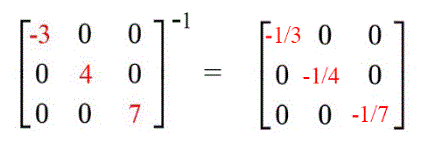


In [45]:
# Ex1
# matrix creation by array input 
A = np.matrix([[1, 21, 30],  
               [63 ,434, 3],  
               [54, 54, 56]]) 

In [46]:
print("Main Diagnol elements : \n", np.diag(A), "\n")

Main Diagnol elements : 
 [  1 434  56] 



In [50]:
# Ex2
A = np.arange(4).reshape(2,2)
A

array([[0, 1],
       [2, 3]])

In [51]:
A.diagonal()

array([0, 3])

In [52]:
np.diag(A)

array([0, 3])

In [53]:
# Ex3
A = np.arange(9).reshape(3,3)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [54]:
A.diagonal()

array([0, 4, 8])

In [55]:
np.diag(A)

array([0, 4, 8])

# Diagonalization

- Diagonalization is the process of transforming a matrix into diagonal form. 

- Diagonal matrices represent the eigenvalues of a matrix in a clear manner.

- Not all matrices can be diagonalized. 

- A diagonalizable matrix could be transformed into a diagonal form through a series of basic operations (multiplication, division, transposition and so on). However, this process can be long and is not easily described.

- In general, any 3 by 3 matrix whose eigenvalues are __distinct__ can be diagonalised.

- If there is a repeated eigenvalue, whether or not the matrix can be diagonalised depends on the eigenvectors.

    (i) If there are just 2 eigenvectors (up to multiplication by a constant), then the matrix cannot be diagonalised.

    (ii) If the unique eigenvalue corresponds to an eigenvector e, but the repeated eigenvalue corresponds to an entire plane, then the matrix can be diagonalised, using e together with any two vectors that lie in the plane.

    (iii) If all three eigenvalues are repeated, then things are much more straightforward: the matrix can't be diagonalised unless it's already diagonal.

#### Example: Is this matrix diagonalizable?

In [91]:
A = np.matrix([[6,  3, -8],  
               [0 ,-2,  0],  
               [1,  0, -3]]) 

In [95]:
evals, evecs = np.linalg.eig(A)
print(evals)
print(evecs)

[ 5. -2. -2.]
[[9.92277877e-01 7.07106781e-01 7.07106781e-01]
 [0.00000000e+00 0.00000000e+00 7.32709814e-16]
 [1.24034735e-01 7.07106781e-01 7.07106781e-01]]


only two linearly independent eigenvectors for A
    
 
But any basis for R3 consists of 3 vectors. Therefore there is no eigenbasis for A, and so by Proposition matrix A is not diagonalizable.   

#### Determine whether the matrix is diagonalizable.

If so, find a nonsingular matrix S and a diagonal matrix D such that $S^{−1}AS=D$.

In [100]:
A = np.matrix([[1,  4],  
               [2 , 3]
             ]) 

In [101]:
evals, evecs = np.linalg.eig(A)
print(evals)
print(evecs)

[-1.  5.]
[[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


Hence the eigenvalues of A are −1 and 5. Since the 2×2 matrix A has two distinct eigenvalues, it is diagonalizable.

find the invertible matrix S, we need eigenvectors.

Let us find the eigenvectors corresponding to the eigenvalue −1.

In [102]:
# using scipy
evals, evecs = la.eig(A)
print(evals)
print(evecs)

[-1.+0.j  5.+0.j]
[[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


# identity matrix

It is the matrix equivalent of the number "1":

$ {\begin{bmatrix} 1 \quad 0  \quad 0 \\ 
                   0 \quad 1  \quad 0 \\
                   0 \quad 0  \quad 1
  \end{bmatrix}} $
  
- It is "square" (has same number of rows as columns),
- It has 1s on the diagonal and 0s everywhere else.
- Its symbol is the capital letter I.
- The Identity Matrix can be 2×2 in size, or 3×3, 4×4, etc ...


# inverse of a matrix

- The Inverse of a Matrix is the same idea as reciprocal but we write it 
$A^{-1}$

- to have an inverse the matrix must be "square" 

- When we multiply a matrix by its inverse we get the Identity Matrix (which is like "1" for matrices):

    $A × A^{-1} = I$

for a 2x2 matrix the inverse is:

$ \Large {\begin{bmatrix} a \quad b  \\ 
                   c \quad d  \\
  \end{bmatrix}} $ 
  
= det(A).$ {\begin{bmatrix} d \quad -b \\-c \quad  a \end{bmatrix}} $ 

= $\frac{1}{ad-bc}$.$ {\begin{bmatrix} d \quad -b  \\-c \quad a \end{bmatrix}} $ 
  
In other words: 
- swap the positions of a and d, 
- put negatives in front of b and c, and 
- divide everything by the determinant (ad-bc).

# Singular Matrix

- A square matrix that does not have a matrix inverse. 

- A matrix is singular __iff__ its determinant is 0. 

A = $ \Large {\begin{bmatrix} a \quad b  \\ 
                   c \quad d  \\
  \end{bmatrix}} $ 
  
Inverse is found as 
  
= det(A).$ {\begin{bmatrix} d \quad -b \\-c \quad  a \end{bmatrix}} $ 

= $\frac{1}{ad-bc}$.$ {\begin{bmatrix} d \quad -b  \\-c \quad a \end{bmatrix}} $ 

For a singular matrix, inverse does not exist. And det(A) = 0

$ \Large |A| = 0$

$ \Large ad - bc = 0$

$ \Large ad = bc$

$\Large \frac{a}{b} = \frac {c}{d}$ ===> Implies collinear columns

let us see the system of linear equations of the above matrix A

$ \Large {\begin{bmatrix} 
    a \quad b  \\ 
    c \quad d  \\
  \end{bmatrix}} $ . $ \Large {\begin{bmatrix} 
    x \\ 
    y \\
  \end{bmatrix}} $  = $ \Large {\begin{bmatrix} 
                                c1 \\ 
                                c2 \\
                       \end{bmatrix}} $
                       
  $\Large ax + by = c1  ==> y =  -\frac{a}{b}x + \frac{c1}{b}$
  
  $\Large cx + dy = c2  ==> y =  -\frac{c}{d}x + \frac{c2}{d}$
  
  if $\Large \frac{a}{b} = \frac {c}{d}$ then the slopes are equal, hence the lines are parallel/exact same vector. There is no solution

# Finding singular values of a matrix

In [26]:
A = np.array([[1,2,3],
              [4,5,6]])

In [27]:
# Get the sqaure matrix

S = A.T @ A

In [28]:
S

array([[17, 22, 27],
       [22, 29, 36],
       [27, 36, 45]])

In [29]:
eigval, eigvec = np.linalg.eig(S)

In [37]:
print('Eigen Values    ... ', end='= ')
print(print('{:10.4f}, {:10.4f}, {:10.4f}'.format(eigval[0], eigval[1], eigval[2] )))    
print('Singular Values ... ', end='= ')
print(print('{:10.4f}, {:10.4f}, {:10.4f}'.format(np.sqrt(eigval[0]), np.sqrt(eigval[1]), np.sqrt(eigval[2] ))))    
print(eigvec)

Eigen Values    ... =    90.4027,     0.5973,     0.0000
None
Singular Values ... =     9.5080,     0.7729,     0.0000
None
[[-0.42866713 -0.80596391  0.40824829]
 [-0.56630692 -0.11238241 -0.81649658]
 [-0.7039467   0.58119908  0.40824829]]
